### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Try and Build Regression model using all the techniques of regression: Linear, Ridge, Lasso, Decision Tree and XGboost

In [98]:
# importing required data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("trainbigmart.csv")
import warnings
warnings.filterwarnings('ignore')

# read the train data
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [99]:
# check for the null values and explore shape as well
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two variables with missing values – Item_Weight and Outlet_Size.

Since Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. On the other hand, Outlet_Size is a categorical variable and hence we will replace the missing values by the mode of the column. You can try different methods to impute missing values as well.



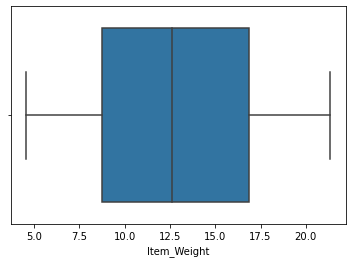

In [100]:
#create box plot on Item weight
sns.boxplot(data['Item_Weight'])
plt.show()

In [101]:
# impute missing values in item weight by mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

# impute outlet size in training data by mode
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [102]:
# check for the null values again
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Explore the categorical columns

In [103]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Encode the categorical variables

To check the categorical variables in the data, you can use the train_data.dtypes() function. This will give you a list of the data types against each variable. For the BigMart sales data, we have the following categorical variable –

Item_Fat_Content

Item_Type,

Outlet_Identifier

Outlet_Size,

Outlet_Location_Type, and

Outlet_Type

In [104]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Item_Fat_Content',
                    'Item_Type',
                    'Outlet_Identifier',
                    'Outlet_Size',
                    'Outlet_Location_Type',
                    'Outlet_Type']
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

Explore categorical columns after label encoding


### Scale the data:

So far we have taken care of the missing values and the categorical (string) variables in the data. Next we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.

Based on the type of model you are building, you will have to normalize the data in such a way that the range of all the variables is almost similar

In [105]:
#apply standard scaler on Item MRP column only
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
data['Item_MRP']=st.fit_transform(data[['Item_MRP']])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,1.747454,9,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,-1.489023,3,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,0.010040,9,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,0.660050,0,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,-1.399220,1,1987,0,2,1,994.7052


### Model Building

Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [106]:
# importing libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# separate the independent and target variable
x=data.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y=data['Item_Outlet_Sales']
# randomly split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# shape of train and test splits
x_train


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1945,18.350000,0,0.089345,9,0.818315,3,2009,1,2,2
1720,17.350000,1,0.168065,9,0.566527,3,2009,1,2,2
1954,10.100000,2,0.053887,6,1.358826,2,2007,1,1,1
1919,10.850000,1,0.162904,13,-0.578605,3,2009,1,2,2
2461,7.170000,2,0.059717,6,-0.160523,6,2004,2,1,1
...,...,...,...,...,...,...,...,...,...,...
2895,12.857645,2,0.277459,10,0.247334,4,1985,2,0,0
7813,12.857645,1,0.178193,4,-1.381006,4,1985,2,0,0
905,17.850000,0,0.065810,5,0.130272,8,1997,2,0,1
5192,9.600000,1,0.049618,9,-1.554231,0,1998,1,2,0


In [107]:
y_train

1945    5369.0112
1720    1230.3984
1954    4250.4672
1919    1482.0708
2461    2348.9424
          ...    
2895     473.3838
7813     109.1912
905     2247.0750
5192      44.6086
235     2293.0152
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [108]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1070,13.500000,1,0.055102,8,-1.668589,7,2002,1,1,1
6305,12.500000,2,0.074035,3,-0.852285,3,2009,1,2,2
8504,12.857645,1,0.124111,9,-0.469531,5,1985,1,2,3
5562,12.500000,2,0.073735,3,-0.865132,8,1997,2,0,1
1410,15.850000,2,0.007140,13,-1.608198,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...
376,7.575000,1,0.055390,4,0.871733,8,1997,2,0,1
7708,12.600000,2,0.074222,4,1.845836,3,2009,1,2,2
3812,9.600000,1,0.006693,9,0.384215,1,1987,0,2,1
3928,12.857645,1,0.097411,3,-1.417350,5,1985,1,2,3


In [109]:
y_test

1070     952.7598
6305    1133.8574
8504    4138.6128
5562    1657.1762
1410     679.1160
          ...    
376     5715.2272
7708    4832.3764
3812    2972.1312
3928    2492.7552
7654    1717.7640
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [110]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6818, 10)
(6818,)
(1705, 10)
(1705,)


GO ahead and perfom model building using Multiple methods. Feel Free to perform any additional preprocessing

In [111]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predicted_train_LR=LR.predict(x_train)
predicted_test_LR=LR.predict(x_test)


In [112]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(y_train,predicted_train_LR))
print(" Mean squared error  :    ",mean_squared_error(y_train,predicted_train_LR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(y_train,predicted_train_LR)))
print(" R2 Score                :",metrics.r2_score(y_train,predicted_train_LR))


 Training DataSet 
 Mean absolute error :     892.7283455367731
 Mean squared error  :     1419455.3673088434
 Root mean squared error:  1191.4089840641807
 R2 Score                : 0.5102173535185135


In [113]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(y_test,predicted_test_LR))
print(" Mean squared error :     ",mean_squared_error(y_test,predicted_test_LR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predicted_test_LR)))
print(" R2 Score                 :",metrics.r2_score(y_train,predicted_train_LR))


 Testing DataSet 
 Mean absolute error :     916.0834352071126
 Mean squared error :      1453873.4056369192
 Root mean squared error:  1205.7667293622424
 R2 Score                 : 0.5102173535185135


In [114]:
acc_train_LR=LR.score(x_train,y_train)
acc_train_LR

0.5102173535185135

In [115]:
acc_test_LR=LR.score(x_test,y_test)
acc_test_LR

0.5095420807504347

In [116]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=0.1)
RR.fit(x_train,y_train)
predicted_train_RR=RR.predict(x_train)
predicted_test_RR=RR.predict(x_test)

In [117]:
print(" Training DataSet ")

print(" Mean squared error  :    ",mean_squared_error(y_train,predicted_train_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(y_train,predicted_train_RR)))

 Training DataSet 
 Mean squared error  :     1419455.5416349866
 Root mean squared error:  1191.4090572238347


In [118]:
print(" Testing DataSet ")

print(" Mean squared error :     ",mean_squared_error(y_test,predicted_test_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predicted_test_RR)))

 Testing DataSet 
 Mean squared error :      1453862.097337845
 Root mean squared error:  1205.7620400965711


In [119]:
acc_train_RR=RR.score(x_train,y_train)
acc_train_RR

0.5102172933673303

In [120]:
acc_test_RR=RR.score(x_test,y_test)
acc_test_RR

0.5095458955563268

In [121]:
from sklearn.linear_model import Lasso
LS=Lasso()
LS.fit(x_train,y_train)
predicted_train_LS=LS.predict(x_train)
predicted_test_LS=LS.predict(x_test)


In [122]:

#margin of error-test data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_test,predicted_test_LS)
rmse = mse**0.5
rmse

1205.8284759436228

In [123]:


#margin of error-train data
from sklearn.metrics import mean_squared_error as mse

mse = mse(y_train,predicted_train_LS)
rmse = mse**0.5
rmse

1191.5810529496089

In [124]:
acc_train_LS=LS.score(x_train,y_train)
acc_train_LS

0.5100758698785494

In [125]:
acc_test_LS=LS.score(x_test,y_test)
acc_test_LS

0.5094918473603397

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
dt=DecisionTreeRegressor(random_state=35)
dt.fit(x_train,y_train)
predicted_train_decisiontree=(dt.predict(x_train))
predicted_test_decisiontree=(dt.predict(x_test))

In [128]:
from sklearn import metrics
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,predicted_train_decisiontree))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,predicted_train_decisiontree))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,predicted_train_decisiontree)))
print("R2 Score                   :",metrics.r2_score(y_train,predicted_train_decisiontree))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,predicted_test_decisiontree))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,predicted_test_decisiontree))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,predicted_test_decisiontree)))
print("R2 Score                   :",metrics.r2_score(y_test,predicted_test_decisiontree))

Decision Tree Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 0.0
Mean Squared Error         : 0.0
Root Mean Squared Error    : 0.0
R2 Score                   : 1.0

-----------------Testing Performance:-----------------
Mean Absolute Error        : 1052.5270988856305
Mean Squared Error         : 2321740.1981297317
Root Mean Squared Error    : 1523.7257621139481
R2 Score                   : 0.216770963553097


In [129]:
acc_train_dt=dt.score(x_train,y_train)
acc_train_dt

1.0

In [130]:
acc_test_dt=dt.score(x_test,y_test)
acc_test_dt

0.216770963553097

In [131]:
params = {'max_depth':[2,3,5,10,20],
         'min_samples_leaf':[5,10,20,50],
         'min_samples_split':[2,5,10,20]
         }

In [132]:
reg_dt = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_dt,
                          param_grid=params,
                          cv=10,
                          scoring='neg_mean_squared_error')

In [133]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [134]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 5}

In [135]:
params2 = {'max_depth':range(1,10),
         'min_samples_leaf':range(50,60),
         'min_samples_split':range(2,5)
          }

In [136]:
reg_dt = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_dt,
                          param_grid=params2,
                          cv=10,
                          scoring='neg_mean_squared_error')

In [137]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(50, 60),
                         'min_samples_split': range(2, 5)},
             scoring='neg_mean_squared_error')

In [138]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 58, 'min_samples_split': 2}

In [139]:
reg_dt_tuned = DecisionTreeRegressor(max_depth= 6,
                                     min_samples_leaf= 59,
                                     min_samples_split= 2
                                    )
reg_dt_tuned = reg_dt_tuned.fit(x_train,y_train)

In [140]:
y_test_predict_dtr = reg_dt_tuned.predict(x_test)
y_train_predict_dtr = reg_dt_tuned.predict(x_train)

In [141]:
from sklearn import metrics
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 741.6995685343915
Mean Squared Error         : 1124106.4379608366
Root Mean Squared Error    : 1060.238858918516
R2 Score                   : 0.6121274125334697

-----------------Testing Performance:-----------------
Mean Absolute Error        : 774.1717987794708
Mean Squared Error         : 1216634.2423148062
Root Mean Squared Error    : 1103.0114425130894
R2 Score                   : 0.5895736886994759


In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [87]:
#instantiating model
reg_xgb = xgb.XGBRegressor(objective='reg:squarederror',
                           eval_metric='rmsle',
                           seed=42,
                           use_label_encoder=False)
reg_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [88]:
y_test_predict_xgb = reg_xgb.predict(x_test)

y_train_predict_xgb = reg_xgb.predict(x_train)

In [89]:
from sklearn import metrics
print("XGBoost Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_xgb))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_xgb))

XGBoost Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 457.22050059712035
Mean Squared Error         : 399540.29414994025
Root Mean Squared Error    : 632.091998169523
R2 Score                   : 0.8621387419769629

-----------------Testing Performance:-----------------
Mean Absolute Error        : 839.2119062557109
Mean Squared Error         : 1453341.2511820195
Root Mean Squared Error    : 1205.5460385991153
R2 Score                   : 0.5097216007593004


In [92]:
params = {
    "max_depth" : [3,4,5],
    'learning_rate' : [0.1,0.01,0.05],
    'gamma' : [0,0.25,1.0] ,
    'scale_pos_weight' : [1,3,5],
    'reg_lambda' : [0,1.0,10.0]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)


C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                 

In [93]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1}

In [94]:
params2 = {
    "max_depth" : [4],
    'learning_rate' : [0.1],
    'gamma' : [0] ,
    'scale_pos_weight' : [1],
    'reg_lambda' : [10,100,500,1000]
}

from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                                          seed=42,subsample=0.9,colsample_bytree=0.5,
                                                          use_label_encoder=False),
                              param_grid=params2,
                              scoring='neg_mean_absolute_error',
                              verbose=0,
                              cv=3
                             )

optimal_params.fit(x_train,y_train,eval_metric='rmsle', eval_set=[(x_test,y_test)], verbose=False)

C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\91901\anaconda3\lib\sit

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                         

In [95]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 1}

In [96]:
reg_xgb = xgb.XGBRegressor(seed=42,
                        objective='reg:squarederror',
                        gamma=0,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
reg_xgb.fit(x_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='rmsle',
            eval_set=[(x_test, y_test)])

[0]	validation_0-rmsle:2.25603
[1]	validation_0-rmsle:1.59410
[2]	validation_0-rmsle:1.22255
[3]	validation_0-rmsle:1.03055
[4]	validation_0-rmsle:0.89955
[5]	validation_0-rmsle:0.79878
[6]	validation_0-rmsle:0.73438
[7]	validation_0-rmsle:0.69287
[8]	validation_0-rmsle:0.66687
[9]	validation_0-rmsle:0.63388
[10]	validation_0-rmsle:0.62387
[11]	validation_0-rmsle:0.61834
[12]	validation_0-rmsle:0.61663
[13]	validation_0-rmsle:0.62423
[14]	validation_0-rmsle:0.61404
[15]	validation_0-rmsle:0.62039
[16]	validation_0-rmsle:nan
[17]	validation_0-rmsle:nan
[18]	validation_0-rmsle:nan
[19]	validation_0-rmsle:nan
[20]	validation_0-rmsle:nan
[21]	validation_0-rmsle:nan
[22]	validation_0-rmsle:nan
[23]	validation_0-rmsle:nan
[24]	validation_0-rmsle:nan


C:\Users\91901\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [142]:
y_test_predict_xgb = reg_xgb.predict(x_test)
y_train_predict_xgb = reg_xgb.predict(x_train)

In [143]:
from sklearn import metrics
print("XGBoost Regressor Model Performance: \n")

print("------------------Training Performance:---------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_xgb))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_xgb))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_xgb))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_xgb)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_xgb))

XGBoost Regressor Model Performance: 

------------------Training Performance:---------------
Mean Absolute Error        : 886.2145904815656
Mean Squared Error         : 1745448.7291891393
Root Mean Squared Error    : 1321.154316947547
R2 Score                   : 0.39773344229850804

-----------------Testing Performance:-----------------
Mean Absolute Error        : 907.1042378437621
Mean Squared Error         : 1773465.9888740634
Root Mean Squared Error    : 1331.7154308913234
R2 Score                   : 0.4017289019864866
